Классификация изображений из датасета CIFAR-10

Датасет CIFAR-10 содержит 60,000 цветных изображений размером 32x32, разбитых на 10 классов. Нужно предсказать класс изображения.

In [1]:
!pip install -q tensorflow

In [1]:
import numpy as np  # Импорт библиотеки для работы с массивами и векторной алгеброй
from sklearn.metrics import accuracy_score  # Импорт функции для оценки точности модели
from matplotlib import pyplot as plt  # Импорт библиотеки для визуализации данных

# Настройка для отображения графиков непосредственно в блокноте (например, в Jupyter)
%matplotlib inline

import tensorflow as tf  # Импорт библиотеки TensorFlow для создания и обучения нейронных сетей
print("We're using TF", tf.__version__)  # Вывод версии TensorFlow
import tensorflow.keras as keras  # Импорт высокоуровневого API Keras для TensorFlow
import tensorflow.keras.models as M  # Импорт функционала для создания моделей в Keras
import tensorflow.keras.layers as L  # Импорт слоев для нейронных сетей в Keras
import tensorflow.keras.backend as K  # Импорт функций для низкоуровневой работы с тензорами и графами в Keras
import pandas as pd  # Импорт библиотеки для работы с данными в табличном виде (DataFrame)

We're using TF 2.17.0


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [3]:
print(X_train.shape)
print(X_test.shape)
print (y_train[:5])
print (y_test[:5])

(50000, 32, 32, 3)
(10000, 32, 32, 3)
[[6]
 [9]
 [9]
 [4]
 [1]]
[[3]
 [8]
 [8]
 [0]
 [6]]


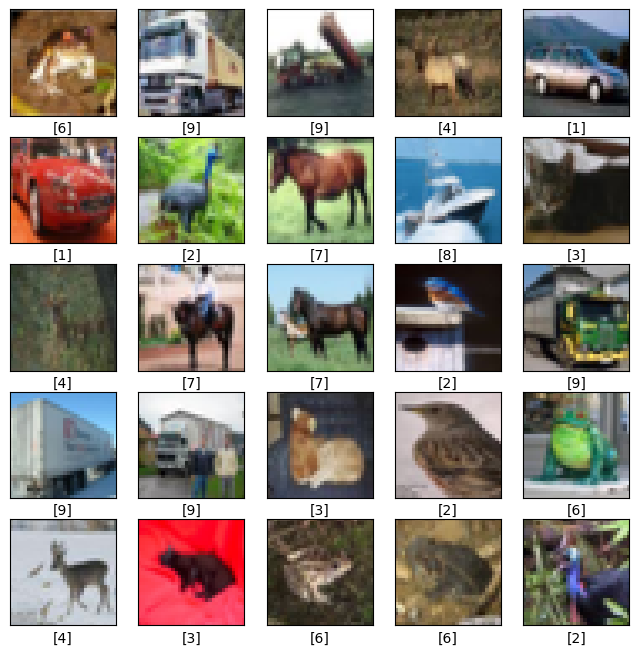

In [7]:
# Визуализация 25 примеров изображений из тренировочного набора

plt.figure(figsize=(8,8))  # Задаем размер области рисования 10x10 дюймов

# Цикл для отображения 25 изображений (5x5 сетка)
for i in range(25):
    plt.subplot(5,5,i+1)  # Создаем сетку 5x5, в каждой ячейке будет одно изображение
    plt.xticks([])  # Убираем метки по оси X (чтобы убрать лишние детали)
    plt.yticks([])  # Убираем метки по оси Y
    plt.grid(False)  # Отключаем сетку
    plt.imshow(X_train[i])  # Отображаем изображение с оттенками серого
    plt.xlabel(y_train[i])  # Подпись под изображением — метка класса (например, цифра, которая изображена)

plt.show()  # Показываем весь рисунок с 25 изображениями

In [8]:
# Приводим значения пикселей к диапазону [0, 1]
X_train_float = X_train.astype('float32') / 255.0 - 0.5
X_test_float = X_test.astype('float32') / 255.0 - 0.5

In [9]:
# Преобразуем метки в формат one-hot, где для каждого класса создается бинарный вектор длины 10
y_train_oh = keras.utils.to_categorical(y_train, 10)  # Применение one-hot кодирования к обучающим меткам
y_test_oh = keras.utils.to_categorical(y_test, 10)      # Применение one-hot кодирования к валидационным меткам

# Вывод информации о форме массива one-hot закодированных меток y_train
print(y_train_oh.shape)  # Печать формы массива y_train_oh

# Вывод первых 5 примеров закодированных меток и соответствующих исходных меток
print(y_train_oh[:5], y_train[:5])  # Печать первых 5 one-hot меток и первых 5 исходных меток

(50000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] [[6]
 [9]
 [9]
 [4]
 [1]]


In [12]:
# Очистка текущего графа и освобождение ресурсов TensorFlow/Keras
K.clear_session()

# Создание новой модели с использованием изображения как входа (без вытягивания в вектор)
model = M.Sequential()  # Определяем модель как последовательную (слои будут добавляться последовательно)

# Добавление сверточного слоя (Conv2D) с 16 фильтрами 3x3, шагом 1 и сохранением размерности (padding='same')
# Входной слой принимает изображение размером 32x32 с тремя каналами
model.add(L.Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=(32,32,3)))

# Добавление слоя подвыборки (MaxPool2D) для уменьшения размерности входного изображения
model.add(L.MaxPool2D())

# Добавление второго сверточного слоя (Conv2D) с 32 фильтрами 3x3
model.add(L.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))

# Добавление второго слоя подвыборки
model.add(L.MaxPool2D())

# Добавление третьего сверточного слоя (Conv2D) с 64 фильтрами 3x3
model.add(L.Conv2D(64, kernel_size=3, strides=1, padding='same', activation='relu'))

# Добавление третьего слоя подвыборки
model.add(L.MaxPool2D())

# Преобразование многомерного тензора в одномерный вектор перед плотным слоем
model.add(L.Flatten())

# Добавление полносвязного (Dense) слоя с 10 нейронами и функцией активации softmax для классификации на 10 классов
model.add(L.Dense(10, activation='softmax'))

In [13]:
# Вывод краткого описания модели
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,834 (132.16 KB)

 Trainable params: 33,834 (132.16 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(
    loss='categorical_crossentropy',  # минимизируем кросс-энтропию
    optimizer='adam',  # так будет быстрее, позже узнаем что это
    metrics=['accuracy']  # выводим процент правильных ответов
)

In [20]:
# Обучение модели на тренировочных данных
history = model.fit(
                    X_train_float,  # Тренировочные данные.
                    y_train_oh,  # One-hot закодированные метки классов для тренировочных данных.
                    batch_size=32,  # Размер мини-выборки (batch size). Модель обновляет свои параметры после каждого мини-пакета из 32 изображений.
                    epochs=10,  # Количество эпох — полный цикл обучения на всех тренировочных данных. Модель обучится за 10 эпохах.
                    validation_data=(X_test_float, y_test_oh)  # Валидационные данные, на которых модель будет проверяться после каждой эпохи.
                    )

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7594 - loss: 0.6920 - val_accuracy: 0.7142 - val_loss: 0.8358
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7706 - loss: 0.6569 - val_accuracy: 0.7241 - val_loss: 0.8084
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7867 - loss: 0.6192 - val_accuracy: 0.7227 - val_loss: 0.8292
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7967 - loss: 0.5871 - val_accuracy: 0.7271 - val_loss: 0.8053
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8112 - loss: 0.5504 - val_accuracy: 0.7204 - val_loss: 0.8373
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8155 - loss: 0.5316 - val_accuracy: 0.7269 - val_loss: 0.8302
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8261 - loss: 0.5025 - val_accuracy: 0.7233 - val_loss: 0.8459
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8272 - loss: 0.4959 -

In [21]:
# Прогнозирование классов для валидационных данных
model.predict(X_test_float)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[7.2326325e-04, 3.4348009e-04, 4.7246422e-04, ..., 9.1402084e-02,
        3.0827407e-02, 2.0933568e-02],
       [5.6654000e-05, 6.5008267e-03, 1.5838513e-09, ..., 1.5492505e-11,
        9.9336004e-01, 8.2399252e-05],
       [7.1616089e-01, 1.5559928e-01, 5.3859071e-04, ..., 1.4378878e-02,
        5.9105255e-02, 4.6610564e-02],
       ...,
       [4.5450193e-08, 1.2587263e-08, 2.4409173e-03, ..., 1.8563544e-02,
        5.9614476e-06, 9.7359312e-08],
       [2.8895612e-03, 1.8823184e-01, 1.8594693e-03, ..., 6.6556960e-02,
        3.7850888e-04, 6.1654910e-03],
       [6.2219878e-09, 2.7401367e-07, 3.6541789e-07, ..., 9.9938548e-01,
        3.3088290e-10, 1.9131021e-09]], dtype=float32)

In [22]:
# финальные предсказанные классы
np.argmax(model.predict(X_test_float), axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3, 8, 0, ..., 5, 4, 7])

In [23]:
model.predict(X_test_float)[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([7.2326325e-04, 3.4348009e-04, 4.7246422e-04, 7.3738426e-01,
       1.3724418e-04, 1.1489509e-01, 2.8811477e-03, 9.1402084e-02,
       3.0827407e-02, 2.0933568e-02], dtype=float32)

In [25]:
# Прогнозируем метки классов для валидационных данных
predicts = np.argmax(model.predict(X_test_float), axis = 1)

# Выводим точность на тестовых (валидационных) данных
print('Test Accuracy: ', accuracy_score(y_test, predicts))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test Accuracy:  0.7267
